In [1]:
#Import necessary libraries and packages

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # Removes deprecation warnings

In [2]:
# read the housing_data_clean.csv file into a dataframe
df = pd.read_csv('housing_data_clean.csv')
df.head()
df.shape

(7855, 16)

In [3]:
#Review features
df.dtypes

APN                         object
Address - Street Number      int64
Address - Street Name       object
Address - Zip Code           int64
Bedrooms                     int64
Bathrooms                    int64
MTRO Square Footage          int64
Lot Size - Acres           float64
Year Built                   int64
DOM                          int64
CDOM                         int64
Original Price               int64
List Price                   int64
Close Price                  int64
Close Date                  object
DPRIME                     float64
dtype: object

In [4]:
#Remove APN, Street Number, Street Name, Zip (since all zipcodes are 95608), DOM, 
#Original Price, and List Price
columns_to_drop = ['APN', 'Address - Street Number', 'Address - Street Name', 'Address - Zip Code','DOM',
                  'Original Price', 'List Price']

df2 = df.drop(columns = columns_to_drop)
df2.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,Close Price,Close Date,DPRIME
0,4,3,2123,0.21,1962,28,235000,2000-05-08,9.0
1,3,2,1832,0.21,1984,10,278000,2000-05-08,9.0
2,3,3,1480,0.19,1992,399,157500,2000-07-05,9.5
3,4,2,1994,0.17,1991,80,217000,2000-07-05,9.5
4,3,2,1451,0.23,1980,46,174000,2000-07-05,9.5


In [5]:
df2.shape

(7855, 9)

#### 1. Creating dummy features
Since all the data is in numerical form, creating dummy features isn't necessary.

#### 2. Scale standardization

array([[<AxesSubplot:title={'center':'Bedrooms'}>,
        <AxesSubplot:title={'center':'Bathrooms'}>,
        <AxesSubplot:title={'center':'MTRO Square Footage'}>],
       [<AxesSubplot:title={'center':'Lot Size - Acres'}>,
        <AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'CDOM'}>],
       [<AxesSubplot:title={'center':'Close Price'}>,
        <AxesSubplot:title={'center':'DPRIME'}>, <AxesSubplot:>]],
      dtype=object)

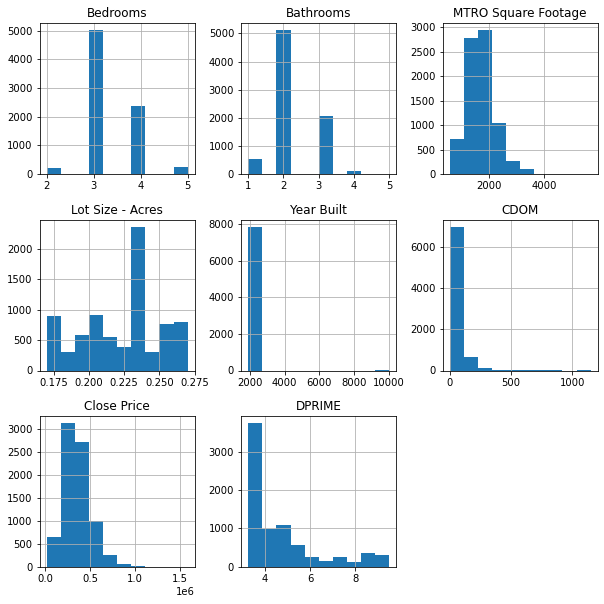

In [6]:
df2.hist(figsize=(10,10))

In [7]:
#There's an obvious error in 'Year Built' which we'll need to fix before moving on
df2 = df2[df2['Year Built'] <= 2023]
df2.shape

(7851, 9)

<AxesSubplot:>

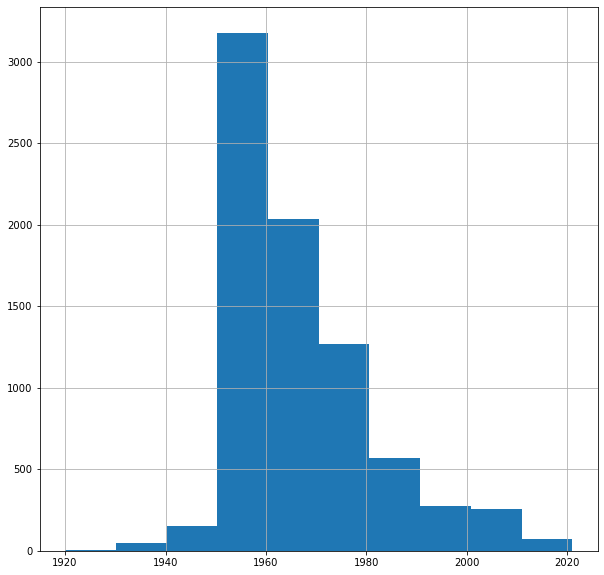

In [8]:
df2['Year Built'].hist(figsize=(10,10))

In [9]:
# Select numeric features to standardize
numeric_features = df2.select_dtypes(include=['float64', 'int64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected features and transform them
scaled_features = scaler.fit_transform(numeric_features)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

scaled_df.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,Close Price,DPRIME
0,1.122315,1.281382,0.770919,-0.444996,-0.374170,-0.275733,-0.817493,2.514028
1,-0.576084,-0.380625,0.195728,-0.444996,1.225797,-0.540477,-0.533417,2.514028
2,-0.576084,1.281382,-0.500037,-1.174818,1.807603,5.180931,-1.329490,2.799603
3,1.122315,-0.380625,0.515937,-1.904640,1.734877,0.489082,-0.936408,2.799603
4,-0.576084,-0.380625,-0.557358,0.284826,0.934893,-0.010989,-1.220485,2.799603


In [10]:
scaled_df.shape

(7851, 8)

In [11]:
#The standardized dataframe doesn't include 'Close Date' column because it's a date-time feature (not numeric)
#I need to concatenate the 'Close Date' column with the standardized features

scaled_df = pd.concat([scaled_df, df2['Close Date']], axis=1)
scaled_df.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,Close Price,DPRIME,Close Date
0,1.122315,1.281382,0.770919,-0.444996,-0.374170,-0.275733,-0.817493,2.514028,2000-05-08
1,-0.576084,-0.380625,0.195728,-0.444996,1.225797,-0.540477,-0.533417,2.514028,2000-05-08
2,-0.576084,1.281382,-0.500037,-1.174818,1.807603,5.180931,-1.329490,2.799603,2000-07-05
3,1.122315,-0.380625,0.515937,-1.904640,1.734877,0.489082,-0.936408,2.799603,2000-07-05
4,-0.576084,-0.380625,-0.557358,0.284826,0.934893,-0.010989,-1.220485,2.799603,2000-07-05


In [12]:
scaled_df.shape

(7855, 9)

#### ***Questions for mentor
1. Why are rows being added back into the scaled dataframe here? It must have something to do with concatenating the 'Close Date' column from df2, but it doesn't make sense to me.
2. Why are we standardizing the data BEFORE splitting it? I'm following the instructions, but it doesn't seem right. 

#### 3. Split data into training and testing subsets

In [13]:
#First we need to move our target feature 'Close Price' to the last column.
# Get the 'Close Price' column
close_price_column = scaled_df.pop('Close Price')

# Add the 'Close Price' column back to the DataFrame in the last position
scaled_df['Close Price'] = close_price_column

# Now, the 'Close Price' column is in the last position

In [14]:
scaled_df.head()

,Bedrooms,Bathrooms,MTRO Square Footage,Lot Size - Acres,Year Built,CDOM,DPRIME,Close Date,Close Price
0,1.122315,1.281382,0.770919,-0.444996,-0.374170,-0.275733,2.514028,2000-05-08,-0.817493
1,-0.576084,-0.380625,0.195728,-0.444996,1.225797,-0.540477,2.514028,2000-05-08,-0.533417
2,-0.576084,1.281382,-0.500037,-1.174818,1.807603,5.180931,2.799603,2000-07-05,-1.329490
3,1.122315,-0.380625,0.515937,-1.904640,1.734877,0.489082,2.799603,2000-07-05,-0.936408
4,-0.576084,-0.380625,-0.557358,0.284826,0.934893,-0.010989,2.799603,2000-07-05,-1.220485


In [15]:
#Specifying X and y for splitting data
X = scaled_df.drop('Close Price', axis=1)
y = scaled_df['Close Price']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#Save data (commenting this out until I meet with mentor to answer my 2 questions)
#X_train.to_csv('X_train.csv', index=False)
#X_test.to_csv('X_test.csv', index=False)
#y_train.to_csv('y_train.csv', index=False)
#y_test.to_csv('y_test.csv', index=False)
